<a href="https://colab.research.google.com/github/tiajulian/eda_bank_marketing/blob/main/eda_bank_markerting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [86]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/My Drive/EDA/bank_customers_train.csv'
df=pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Analysis

In [87]:
pd.set_option('display.max_columns',None)
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35,blue-collar,single,high.school,NaN,no,no,cellular,jul,thu,117,3,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
1,52,blue-collar,married,NaN,NaN,yes,no,telephone,jun,thu,118,4,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
2,38,services,married,high.school,NaN,no,no,telephone,jun,tue,253,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
3,44,admin.,married,university.degree,no,yes,no,telephone,oct,wed,749,1,999,0,nonexistent,-3.4,92.431,-26.9,0.735,5017.5,yes
4,25,services,divorced,basic.4y,no,yes,no,telephone,may,fri,601,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
5,49,services,married,high.school,no,no,no,cellular,aug,mon,565,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
6,30,technician,divorced,high.school,no,yes,yes,telephone,jun,tue,131,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
7,38,blue-collar,married,basic.6y,no,yes,no,cellular,may,mon,135,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
8,34,admin.,married,high.school,no,yes,yes,cellular,jul,wed,411,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
9,22,blue-collar,married,basic.9y,no,yes,no,cellular,may,thu,23,1,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no


In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,39188.0,39.997754,10.407876,17.000,32.000,38.000,47.000,98.000
duration,39188.0,258.125574,258.683120,0.000,102.000,179.000,320.000,4918.000
campaign,39188.0,2.568720,2.771971,1.000,1.000,2.000,3.000,56.000
pdays,39188.0,962.588394,186.631343,0.000,999.000,999.000,999.000,999.000
previous,39188.0,0.173191,0.495921,0.000,0.000,0.000,0.000,7.000
emp.var.rate,39188.0,0.079787,1.571619,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,39188.0,93.575327,0.579311,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,39188.0,-40.499862,4.631198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,39188.0,3.618962,1.735424,0.634,1.344,4.857,4.961,5.045
nr.employed,39188.0,5166.920478,72.290033,4963.600,5099.100,5191.000,5228.100,5228.100


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39188 entries, 0 to 39187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39188 non-null  int64  
 1   job             38872 non-null  object 
 2   marital         39109 non-null  object 
 3   education       37535 non-null  object 
 4   default         31026 non-null  object 
 5   housing         38248 non-null  object 
 6   loan            38248 non-null  object 
 7   contact         39188 non-null  object 
 8   month           39188 non-null  object 
 9   day_of_week     39188 non-null  object 
 10  duration        39188 non-null  int64  
 11  campaign        39188 non-null  int64  
 12  pdays           39188 non-null  int64  
 13  previous        39188 non-null  int64  
 14  poutcome        39188 non-null  object 
 15  emp.var.rate    39188 non-null  float64
 16  cons.price.idx  39188 non-null  float64
 17  cons.conf.idx   39188 non-null 

In [90]:
df['y']=df['y'].map({'yes':1,'no':0})

## **Data Preprocessing**


###missing values

In [91]:
df_cleaned=df.copy()
df_cleaned=df.dropna(subset=['job','marital','housing'])
print(type(df_cleaned))
print((df_cleaned.isnull().sum()/len(df_cleaned))*100)
print(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
age                0.000000
job                0.000000
marital            0.000000
education          3.926798
default           20.584663
housing            0.000000
loan               0.000000
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64
   age          job   marital          education default housing loan  \
0   35  blue-collar    single        high.school     NaN      no   no   
1   52  blue-collar   married                NaN     NaN     yes   no   
2   38     services   married        high.school     NaN      no   no   
3   44       admin.   married  university.degree      no     yes   

In [92]:
df_cleaned['education'] = df_cleaned['education'].fillna('unknown')
print(df_cleaned)

       age          job   marital          education default housing loan  \
0       35  blue-collar    single        high.school     NaN      no   no   
1       52  blue-collar   married            unknown     NaN     yes   no   
2       38     services   married        high.school     NaN      no   no   
3       44       admin.   married  university.degree      no     yes   no   
4       25     services  divorced           basic.4y      no     yes   no   
...    ...          ...       ...                ...     ...     ...  ...   
39183   43       admin.    single  university.degree      no      no   no   
39184   31       admin.   married        high.school      no      no   no   
39185   49  blue-collar   married           basic.4y     NaN      no   no   
39186   31       admin.    single  university.degree      no     yes   no   
39187   43  blue-collar   married           basic.9y      no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \


<ipython-input-92-4d94885af257>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['education'] = df_cleaned['education'].fillna('unknown')


In [93]:
print(df_cleaned['default'].nunique())
print(df_cleaned['default'].value_counts())

2
default
no     30071
yes        2
Name: count, dtype: int64


In [94]:
df_cleaned['default']=df_cleaned['default'].fillna('no')
print(df_cleaned)

       age          job   marital          education default housing loan  \
0       35  blue-collar    single        high.school      no      no   no   
1       52  blue-collar   married            unknown      no     yes   no   
2       38     services   married        high.school      no      no   no   
3       44       admin.   married  university.degree      no     yes   no   
4       25     services  divorced           basic.4y      no     yes   no   
...    ...          ...       ...                ...     ...     ...  ...   
39183   43       admin.    single  university.degree      no      no   no   
39184   31       admin.   married        high.school      no      no   no   
39185   49  blue-collar   married           basic.4y      no      no   no   
39186   31       admin.    single  university.degree      no     yes   no   
39187   43  blue-collar   married           basic.9y      no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \


<ipython-input-94-213059155756>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['default']=df_cleaned['default'].fillna('no')


In [95]:
df_cleaned.loc[df_cleaned['pdays']==999,'pdays']=0

In [96]:
df_cleaned.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,35,blue-collar,single,high.school,no,no,no,cellular,jul,thu,117,3,0,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
1,52,blue-collar,married,unknown,no,yes,no,telephone,jun,thu,118,4,0,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
2,38,services,married,high.school,no,no,no,telephone,jun,tue,253,2,0,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0
3,44,admin.,married,university.degree,no,yes,no,telephone,oct,wed,749,1,0,0,nonexistent,-3.4,92.431,-26.9,0.735,5017.5,1
4,25,services,divorced,basic.4y,no,yes,no,telephone,may,fri,601,1,0,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
5,49,services,married,high.school,no,no,no,cellular,aug,mon,565,1,0,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
6,30,technician,divorced,high.school,no,yes,yes,telephone,jun,tue,131,2,0,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0
7,38,blue-collar,married,basic.6y,no,yes,no,cellular,may,mon,135,2,0,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,0
8,34,admin.,married,high.school,no,yes,yes,cellular,jul,wed,411,1,0,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
9,22,blue-collar,married,basic.9y,no,yes,no,cellular,may,thu,23,1,0,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,0


In [97]:
#print('total',df.nunique())
convert_to_num=df_cleaned.columns[df_cleaned.nunique() <3]
for col in convert_to_num:
  print(col,df[col].unique())

default [nan 'no' 'yes']
housing ['no' 'yes' nan]
loan ['no' 'yes' nan]
contact ['cellular' 'telephone']
y [0 1]


##Applying binning technique for age column


In [98]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37868.0,39.955081,10.387939,17.000,32.000,38.000,47.000,98.000
duration,37868.0,258.328800,258.644697,0.000,102.000,179.000,321.000,4918.000
campaign,37868.0,2.566415,2.763339,1.000,1.000,2.000,3.000,43.000
pdays,37868.0,0.220080,1.350677,0.000,0.000,0.000,0.000,27.000
previous,37868.0,0.172864,0.495322,0.000,0.000,0.000,0.000,7.000
emp.var.rate,37868.0,0.077356,1.570475,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,37868.0,93.572891,0.578370,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,37868.0,-40.516676,4.632986,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,37868.0,3.616149,1.735360,0.634,1.344,4.857,4.961,5.045
nr.employed,37868.0,5166.895239,72.259397,4963.600,5099.100,5191.000,5228.100,5228.100


## Numerical

In [99]:
num_cols=df_cleaned.select_dtypes(include=np.number).columns

In [184]:
num_col_1=[col for col in num_cols if df[col].nunique() <12]
#print(df_cleaned[num_cols].nunique())
print(num_col_1)


['previous', 'emp.var.rate', 'nr.employed', 'y']


<ipython-input-185-7a3ea8ac561b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_cleaned,x=col,y='y',palette='dark')
<ipython-input-185-7a3ea8ac561b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_cleaned,x=col,y='y',palette='dark')
<ipython-input-185-7a3ea8ac561b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_cleaned,x=col,y='y',palette='dark')
<ipython-input-185-7a3ea8ac561b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

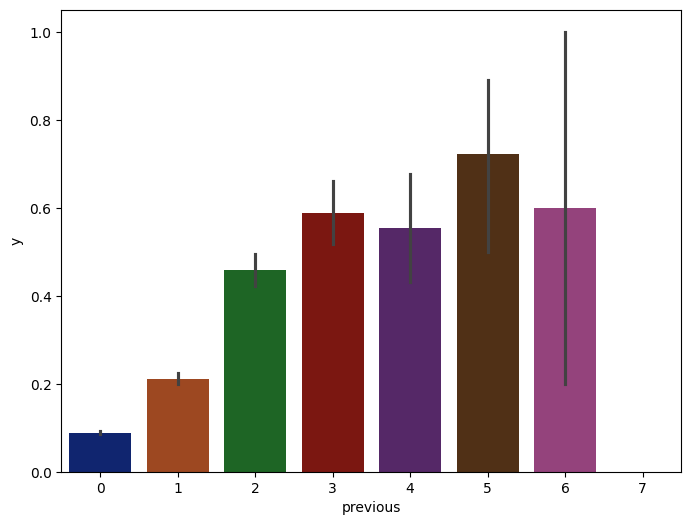

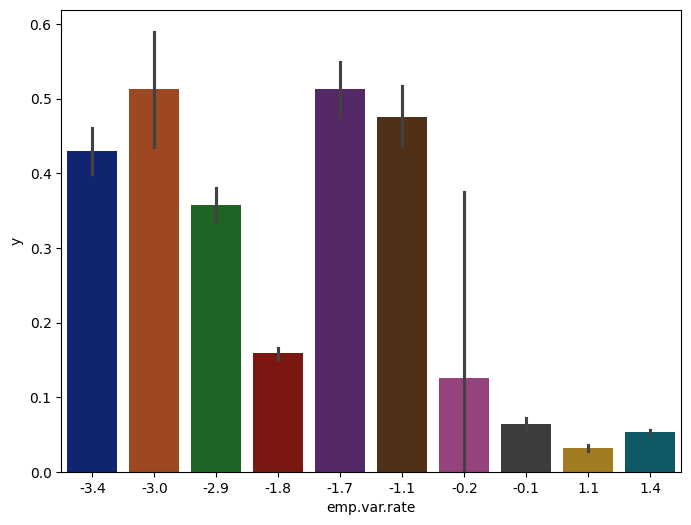

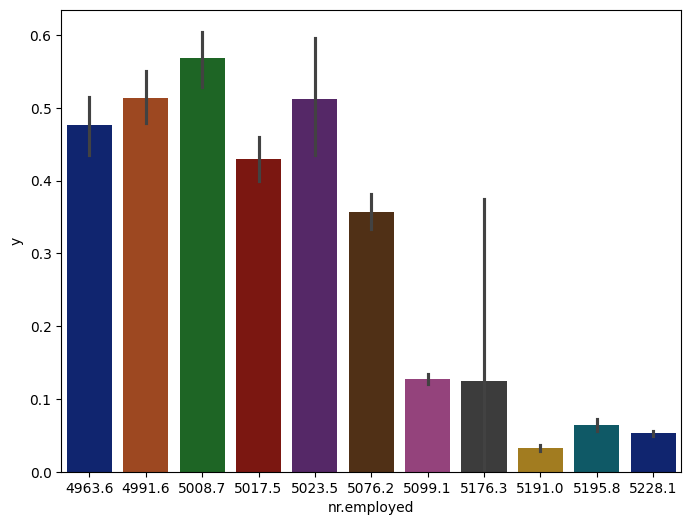

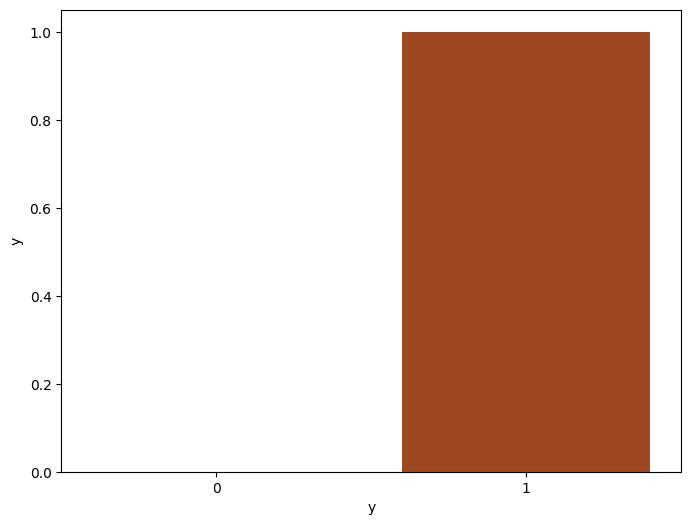

In [185]:
for col in num_col_1:
  plt.figure(figsize=(8,6))
  sb.barplot(data=df_cleaned,x=col,y='y',palette='dark')


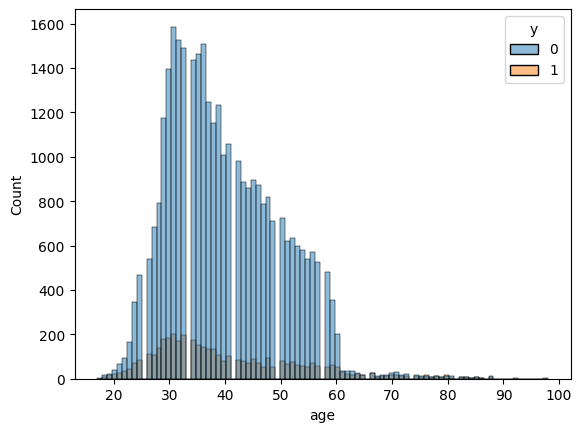

In [101]:
#print(df_cleaned['age'].unique())
#print(df_cleaned['age']==1])
sb.histplot(data=df_cleaned,x='age',hue='y' )
plt.show()

<ipython-input-102-7f4a0e35ddd7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(y='duration',x='y',data=df_cleaned,palette='deep')


<Axes: xlabel='y', ylabel='duration'>

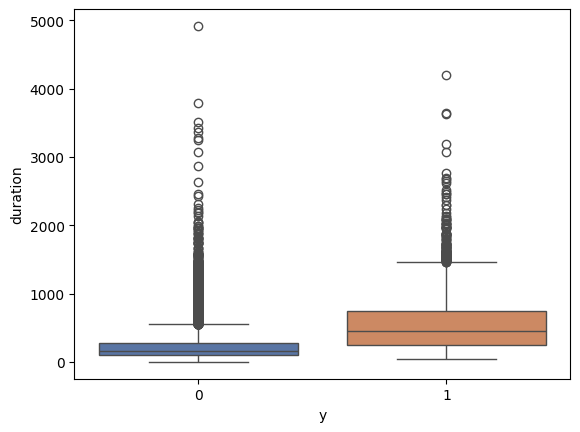

In [102]:
sb.boxplot(y='duration',x='y',data=df_cleaned,palette='deep')

people that have positive response has higher median in duration
yes has higher variability in duration

In [103]:
df_cleaned['campaign'].unique()

array([ 3,  4,  2,  1,  5,  9, 14,  7,  6, 11, 26, 10,  8, 20, 25, 15, 18,
       16, 17, 21, 12, 13, 35, 28, 19, 32, 23, 24, 30, 29, 33, 22, 43, 27,
       34, 42, 31, 40, 37, 41, 39])

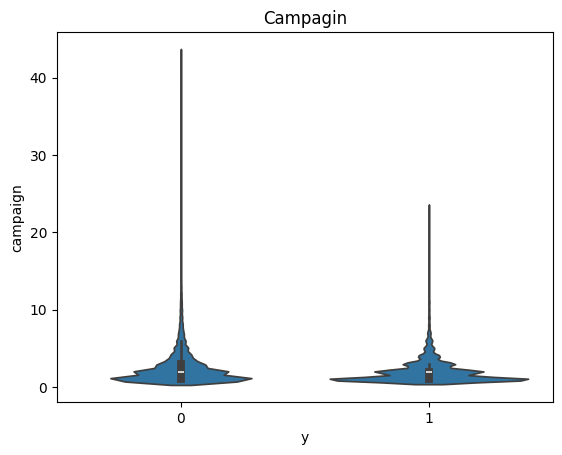

In [104]:
sb.violinplot(data=df_cleaned,x='y', y='campaign')
plt.title("Campagin")
plt.show()

      poutcome  pdays
10     failure      0
14     failure      0
15     failure      0
16     failure      0
32     failure      0
...        ...    ...
39112  failure      0
39123  failure      0
39131  failure      0
39149  failure      0
39175  failure      0

[5173 rows x 2 columns]


<Axes: xlabel='poutcome', ylabel='pdays'>

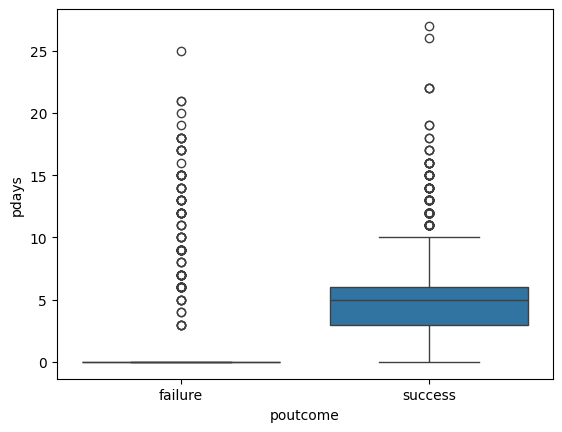

In [134]:
#sb.histplot(data=df_cleaned,x='pdays')
##df_cleaned[df_cleaned['pdays']>0].head(20)
#df_cleaned['pdays'].value_counts()
ptable=df_cleaned.loc[df_cleaned['previous']>0,['poutcome','pdays']]
print(ptable)
sb.boxplot(data=ptable,x='poutcome',y='pdays')
#sb.barplot(data=df_cleaned,x='poutcome',y='pdays')
# pdays               27
# previous             8
# emp.var.rate        10
# cons.price.idx      26
# cons.conf.idx       26
# euribor3m          313
# nr.employed         11
# y
#scatter_plot = sb.scatterplot(x='duration', y='nr.employed', hue='y', data=df_cleaned, palette='viridis', s=100)

Where the pervious called made, the result for success is more with the median of 5 days untill the customer contacted for the previous campaign.

In [128]:
df_cleaned['previous'].value_counts()
df_cleaned['poutcome'].value_counts()

poutcome
nonexistent    32695
failure         3921
success         1252
Name: count, dtype: int64

<Axes: ylabel='emp.var.rate'>

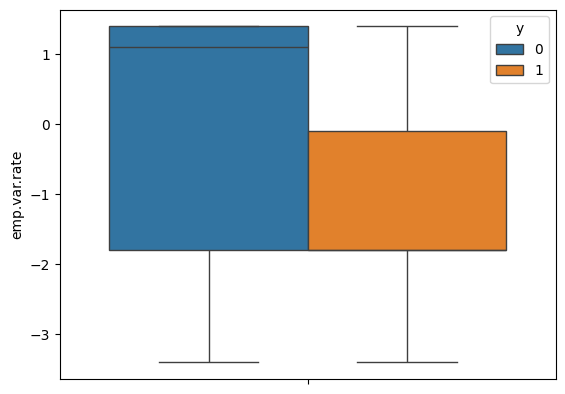

In [152]:
sb.boxplot(data=df_cleaned,y='emp.var.rate',hue='y')

<Axes: ylabel='cons.price.idx'>

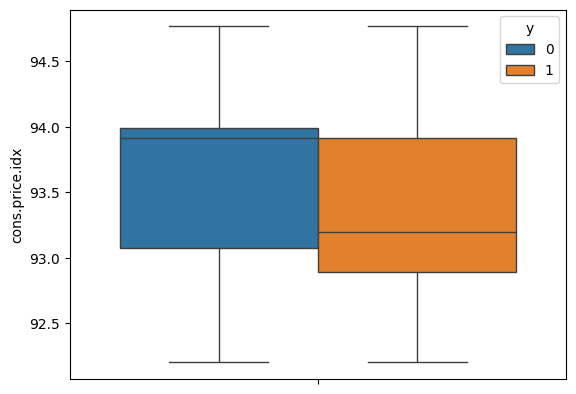

In [150]:
sb.boxplot(data=df_cleaned,y='cons.price.idx',hue='y')

<Axes: ylabel='cons.conf.idx'>

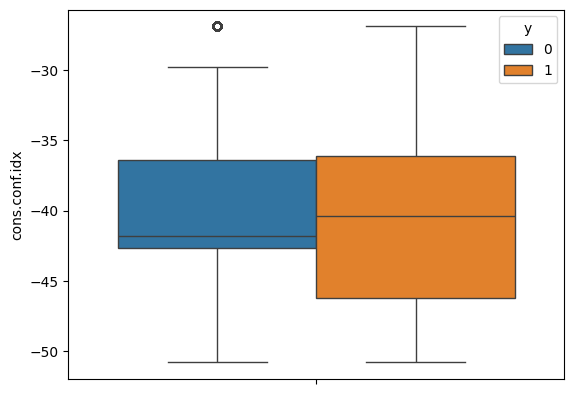

In [148]:
sb.boxplot(data=df_cleaned,y='cons.conf.idx',hue='y')

<Axes: ylabel='euribor3m'>

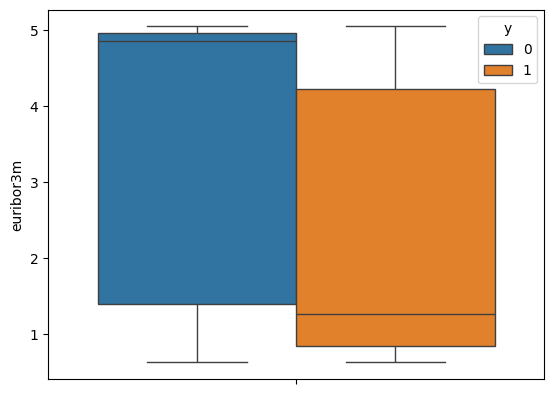

In [153]:
sb.boxplot(data=df_cleaned,y='euribor3m',hue='y')

<Axes: ylabel='nr.employed'>

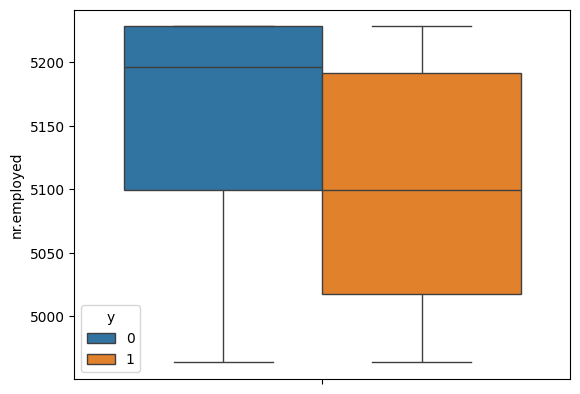

In [154]:
sb.boxplot(data=df_cleaned,y='nr.employed',hue='y')

##Categorical Analysis

In [159]:
cat=df_cleaned.select_dtypes(include='object').columns.tolist()


job


<ipython-input-172-9c48fbb5662c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_cleaned, x=column, y='y',palette='dark')


marital


<ipython-input-172-9c48fbb5662c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_cleaned, x=column, y='y',palette='dark')


education


<ipython-input-172-9c48fbb5662c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_cleaned, x=column, y='y',palette='dark')


default


<ipython-input-172-9c48fbb5662c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_cleaned, x=column, y='y',palette='dark')


housing


<ipython-input-172-9c48fbb5662c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_cleaned, x=column, y='y',palette='dark')


loan


<ipython-input-172-9c48fbb5662c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_cleaned, x=column, y='y',palette='dark')


contact


<ipython-input-172-9c48fbb5662c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_cleaned, x=column, y='y',palette='dark')


month


<ipython-input-172-9c48fbb5662c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_cleaned, x=column, y='y',palette='dark')


day_of_week


<ipython-input-172-9c48fbb5662c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_cleaned, x=column, y='y',palette='dark')


poutcome


<ipython-input-172-9c48fbb5662c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=df_cleaned, x=column, y='y',palette='dark')


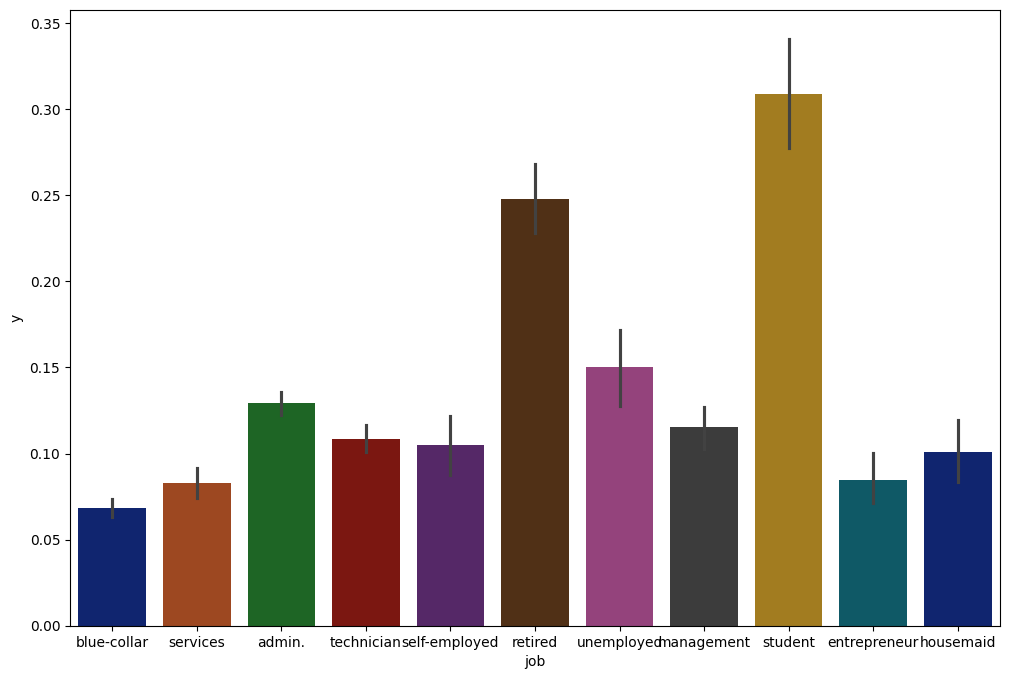

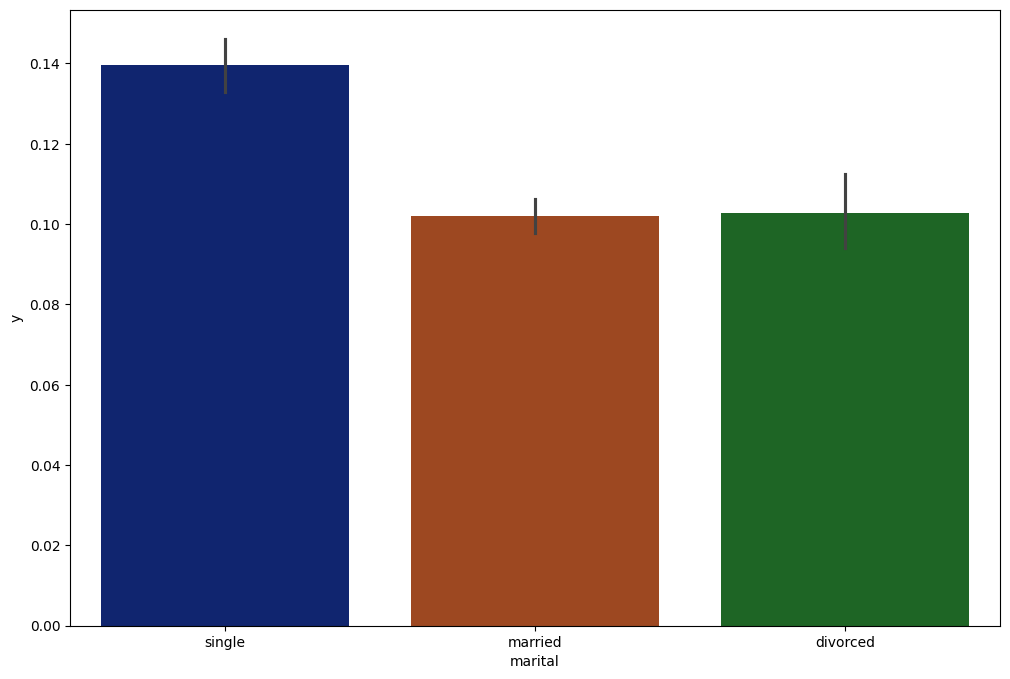

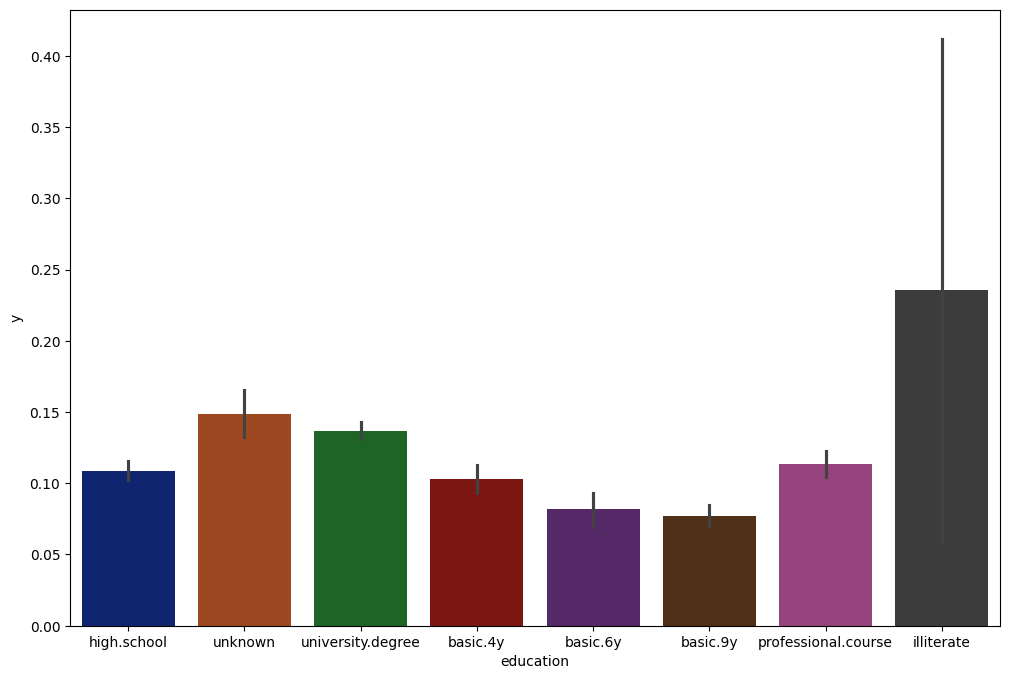

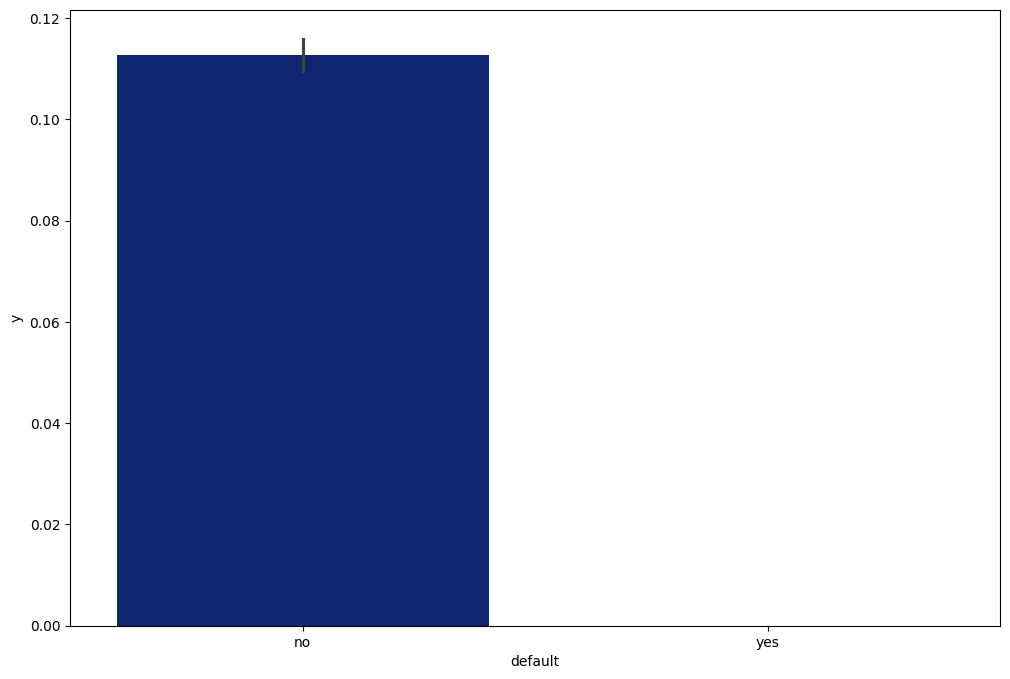

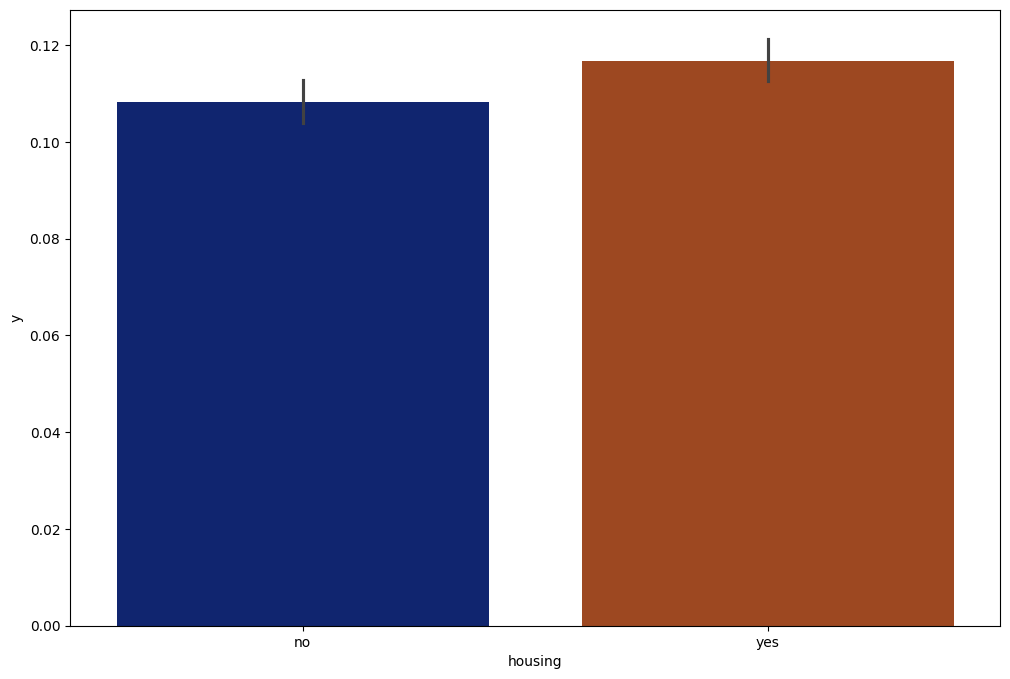

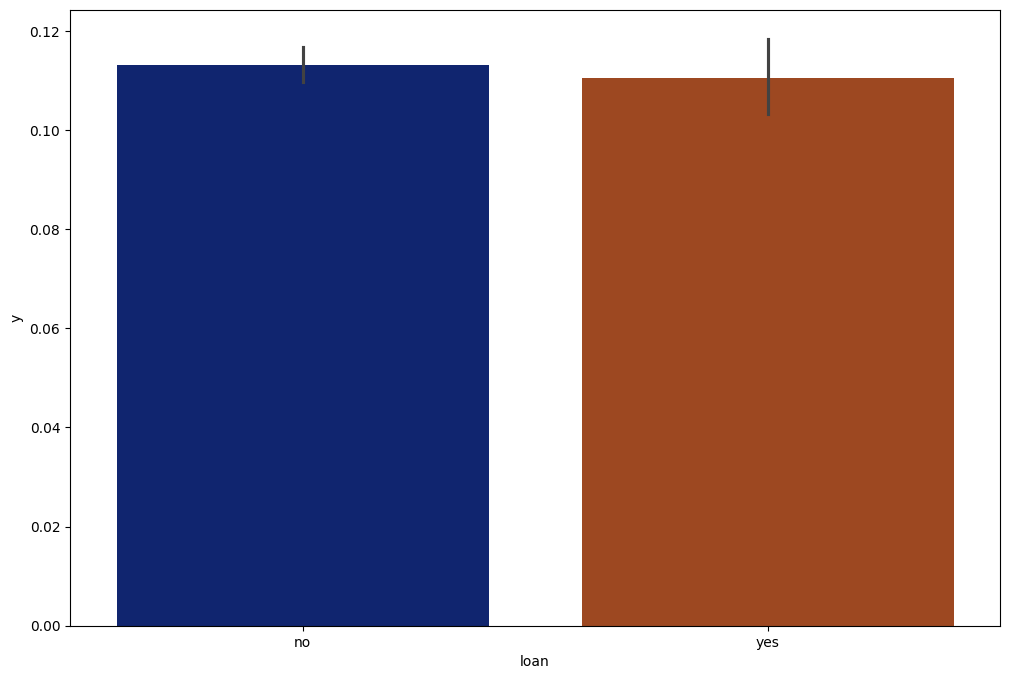

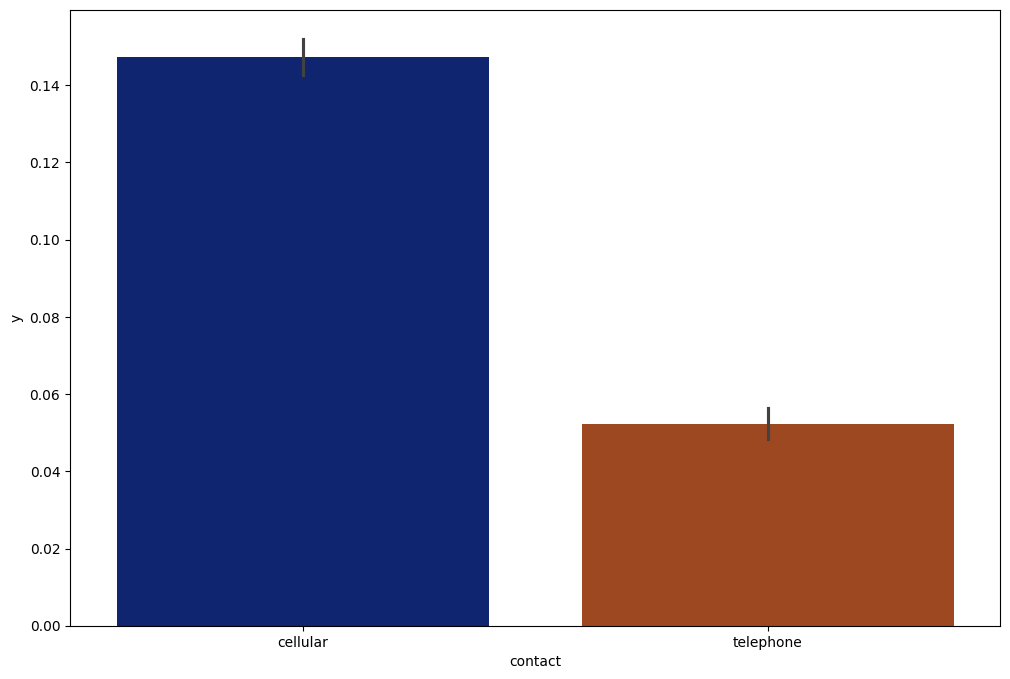

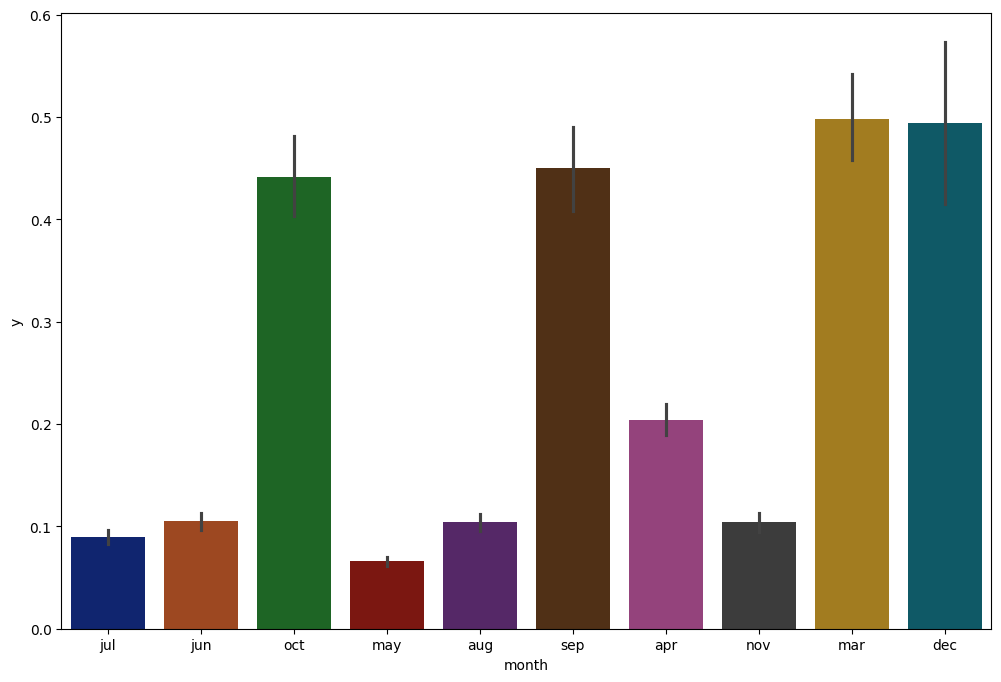

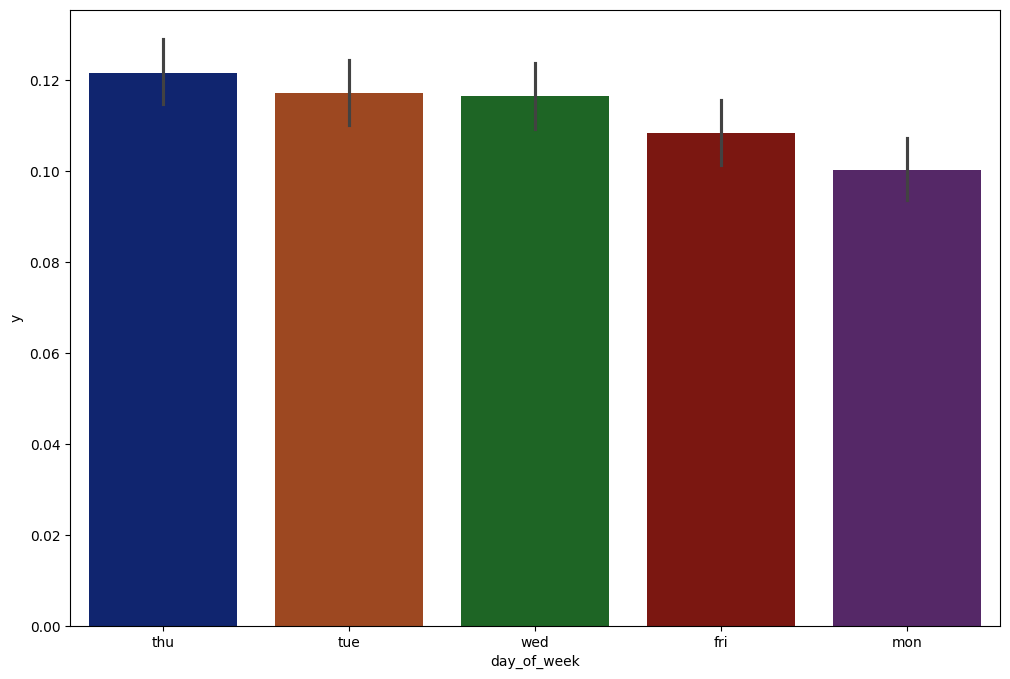

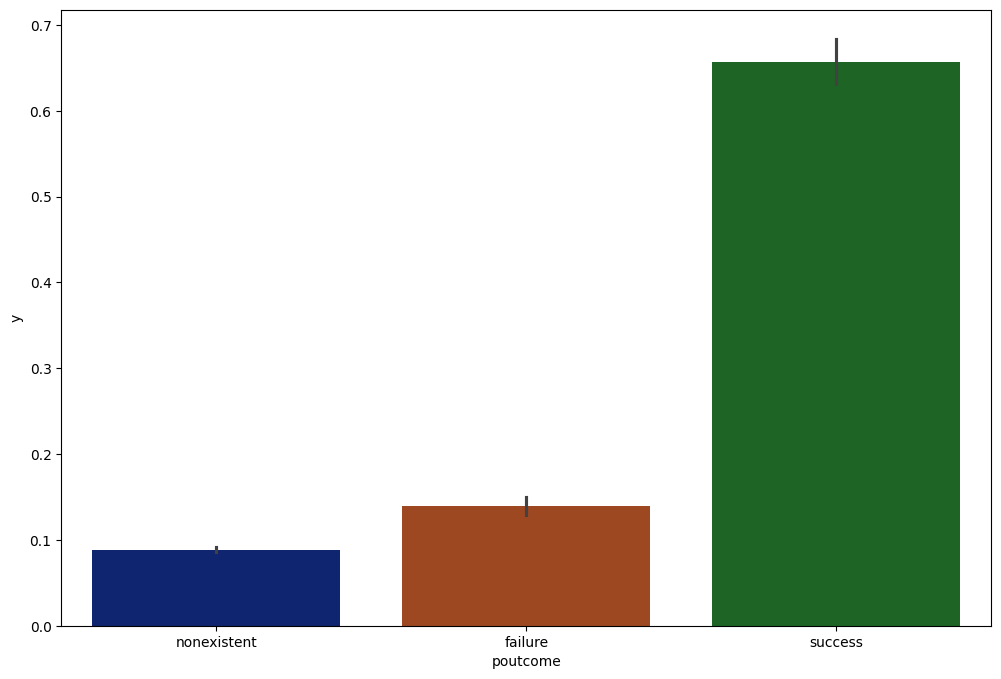

In [172]:
for column in cat:
  print(column)
  plt.figure(figsize=(12,8))
  sb.barplot(data=df_cleaned, x=column, y='y',palette='dark')
